In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib 
matplotlib.rcParams["figure.figsize"] = (20,10)
import seaborn as sns
import plotly.express as px



In [2]:
df = pd.read_csv('Bengaluru_House_Data.csv')
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [3]:
df.shape

(13320, 9)

In [4]:
df.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [6]:
df.describe()

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


In [7]:
df.corr()

,bath,balcony,price
bath,1.000000,0.204201,0.456345
balcony,0.204201,1.000000,0.120355
price,0.456345,0.120355,1.000000


<AxesSubplot:>

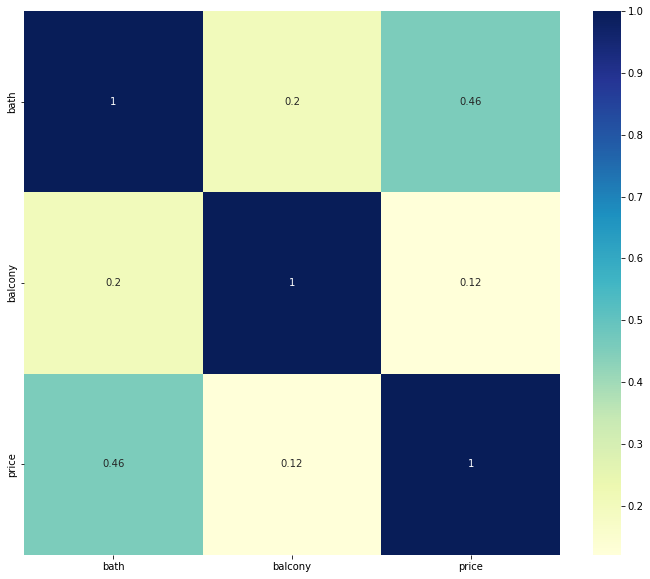

In [8]:
#Let's plot correlation heatmap
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)

In [9]:
for i in df.columns:
    print(df[i].name)
    print(df[i].duplicated().sum())
    print('-'*10)

area_type
13316
----------
availability
13239
----------
location
12014
----------
size
13288
----------
society
10631
----------
total_sqft
11203
----------
bath
13300
----------
balcony
13315
----------
price
11326
----------


In [10]:
df.shape

(13320, 9)

In [11]:
df.isnull().sum()



area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

Text(0.5, 1.0, 'Missing values heatmap')

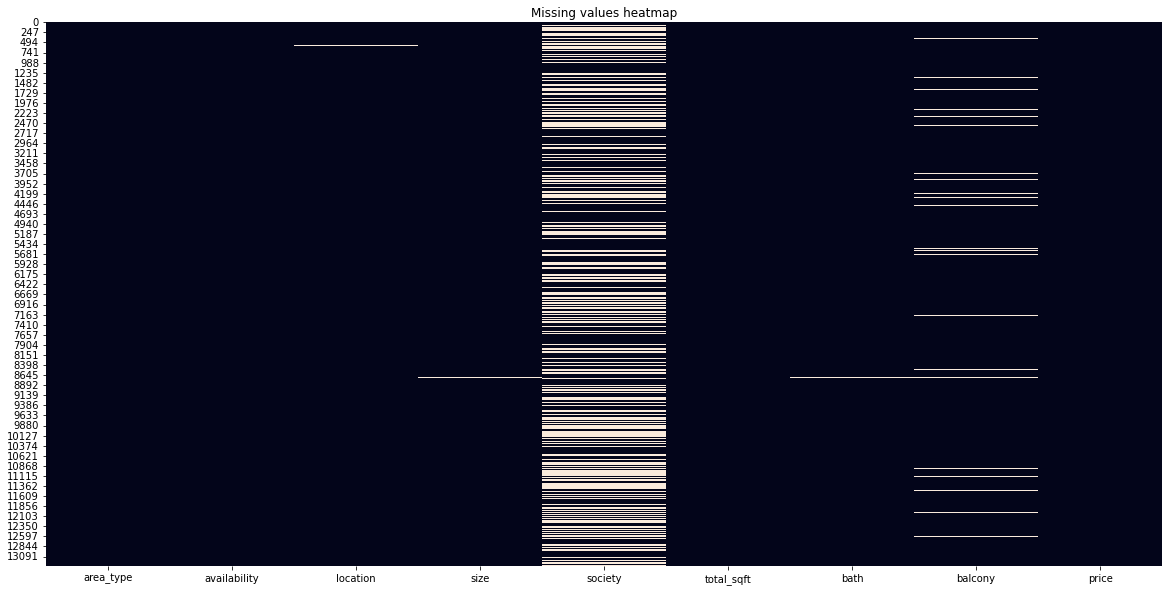

In [12]:
sns.heatmap(df.isnull(), cbar = False).set_title("Missing values heatmap")

In [13]:
df.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

In [14]:
#Let's see the diffrent datatypes columns
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
Numeric_Columns= df.select_dtypes(include=numerics)
Catagorical_Columns = df.select_dtypes(include=['object','category'])

In [15]:
#Numeric and categorical data columns
print('Catagorical Columns')
print(Catagorical_Columns.columns)
print('--------------------------')
print('Numeric Columns')
print(Numeric_Columns.columns)


Catagorical Columns
Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft'],
      dtype='object')
--------------------------
Numeric Columns
Index(['bath', 'balcony', 'price'], dtype='object')


In [16]:
missing_values_col = ['location','size','society','bath','balcony']

In [17]:
df['bath'] = df['bath'].fillna(df['bath'].mean())

In [18]:
df['balcony'] = df['balcony'].fillna(df['balcony'].mean())

In [19]:
df.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath               0
balcony            0
price              0
dtype: int64

In [20]:
df.drop('society',axis=1,inplace=True)

In [21]:
df.isnull().sum()

area_type        0
availability     0
location         1
size            16
total_sqft       0
bath             0
balcony          0
price            0
dtype: int64

In [22]:
for i in df.columns:
    print(df[i].name)
    print(df[i].value_counts())
    print('-'*10)

area_type
Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: area_type, dtype: int64
----------
availability
Ready To Move    10581
18-Dec             307
18-May             295
18-Apr             271
18-Aug             200
                 ...  
15-Aug               1
17-Jan               1
16-Nov               1
16-Jan               1
14-Jul               1
Name: availability, Length: 81, dtype: int64
----------
location
Whitefield                        540
Sarjapur  Road                    399
Electronic City                   302
Kanakpura Road                    273
Thanisandra                       234
                                 ... 
Bapuji Layout                       1
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
singapura paradise                  1
Abshot Layout                       1
Name: location, Length: 1305, dtype: int64
----------
size
2 BHK         5199
3 BHK 

In [23]:
df.dropna(inplace=True)

In [24]:
df.isnull().sum()

area_type       0
availability    0
location        0
size            0
total_sqft      0
bath            0
balcony         0
price           0
dtype: int64

In [25]:
df.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200,2.0,1.0,51.00


<AxesSubplot:xlabel='area_type', ylabel='price'>

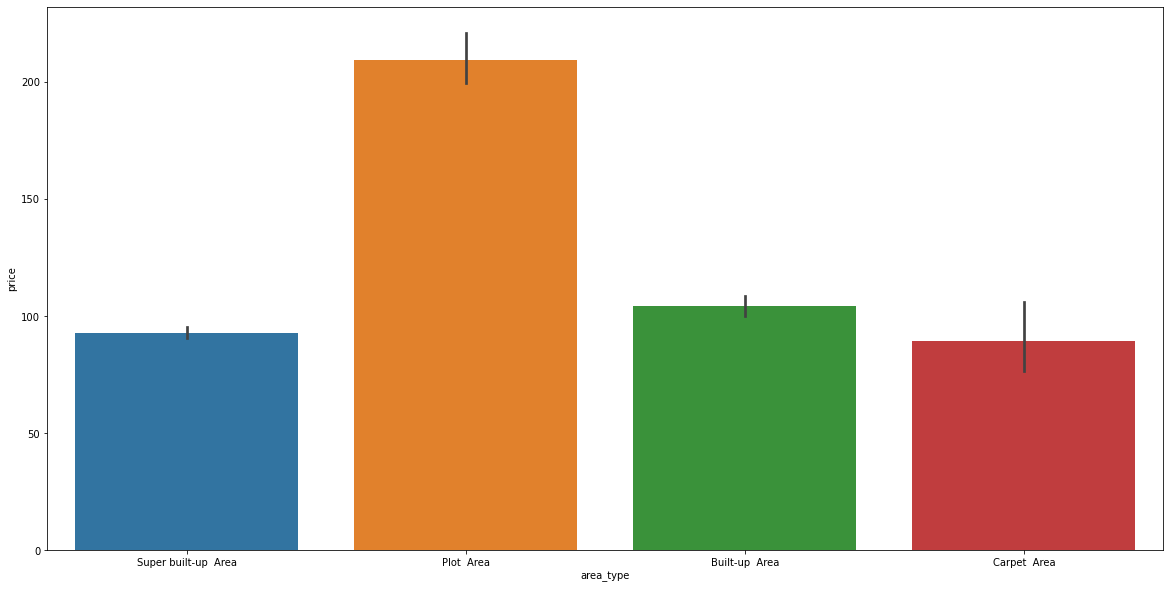

In [26]:
sns.barplot(x = 'area_type',y='price',data=df)

<AxesSubplot:xlabel='availability', ylabel='price'>

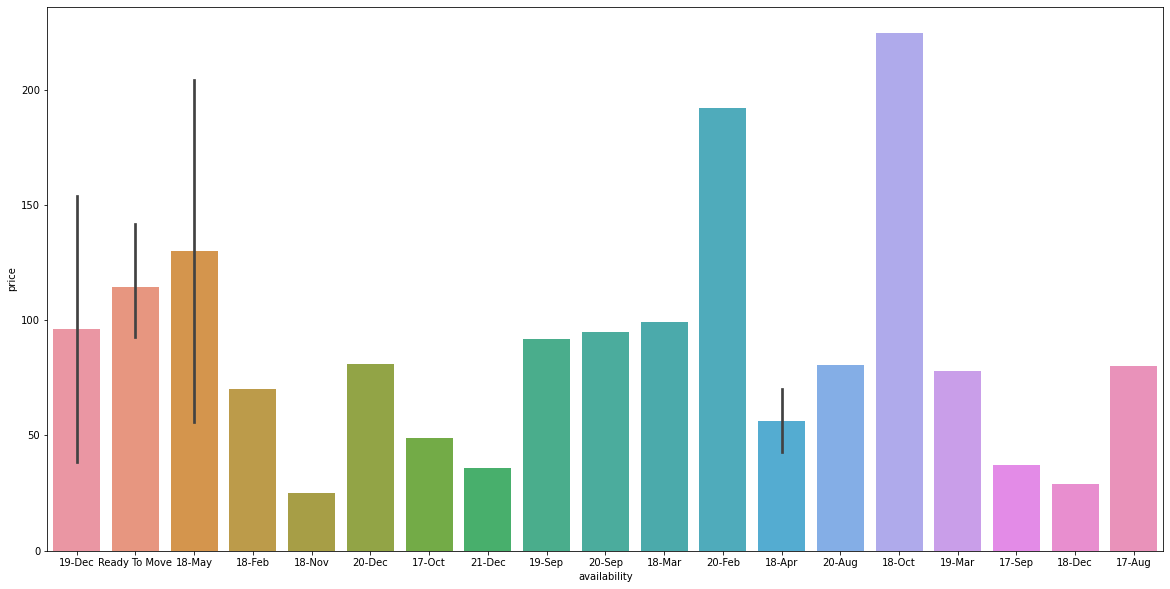

In [27]:
x  = df['availability'][:100]
sns.barplot(x = x,y='price',data=df)

In [28]:
df.drop('availability',axis=1,inplace=True)

In [29]:
df

,area_type,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,Electronic City Phase II,2 BHK,1056,2.0,1.000000,39.07
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600,5.0,3.000000,120.00
2,Built-up Area,Uttarahalli,3 BHK,1440,2.0,3.000000,62.00
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521,3.0,1.000000,95.00
4,Super built-up Area,Kothanur,2 BHK,1200,2.0,1.000000,51.00
...,...,...,...,...,...,...,...
13315,Built-up Area,Whitefield,5 Bedroom,3453,4.0,0.000000,231.00
13316,Super built-up Area,Richards Town,4 BHK,3600,5.0,1.584376,400.00
13317,Built-up Area,Raja Rajeshwari Nagar,2 BHK,1141,2.0,1.000000,60.00
13318,Super built-up Area,Padmanabhanagar,4 BHK,4689,4.0,1.000000,488.00


In [32]:
df.drop('balcony',axis=1,inplace=True)

In [33]:
df

,area_type,location,size,total_sqft,bath,price
0,Super built-up Area,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Built-up Area,Uttarahalli,3 BHK,1440,2.0,62.00
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Super built-up Area,Kothanur,2 BHK,1200,2.0,51.00
...,...,...,...,...,...,...
13315,Built-up Area,Whitefield,5 Bedroom,3453,4.0,231.00
13316,Super built-up Area,Richards Town,4 BHK,3600,5.0,400.00
13317,Built-up Area,Raja Rajeshwari Nagar,2 BHK,1141,2.0,60.00
13318,Super built-up Area,Padmanabhanagar,4 BHK,4689,4.0,488.00


In [34]:
df['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [35]:
df['bhk'] = df['size'].apply(lambda x: int(x.split(' ')[0]))
df.head()

,area_type,location,size,total_sqft,bath,price,bhk
0,Super built-up Area,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Built-up Area,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Super built-up Area,Kothanur,2 BHK,1200,2.0,51.00,2


In [36]:
df.drop('size',axis=1,inplace=True)

In [37]:
df

,area_type,location,total_sqft,bath,price,bhk
0,Super built-up Area,Electronic City Phase II,1056,2.0,39.07,2
1,Plot Area,Chikka Tirupathi,2600,5.0,120.00,4
2,Built-up Area,Uttarahalli,1440,2.0,62.00,3
3,Super built-up Area,Lingadheeranahalli,1521,3.0,95.00,3
4,Super built-up Area,Kothanur,1200,2.0,51.00,2
...,...,...,...,...,...,...
13315,Built-up Area,Whitefield,3453,4.0,231.00,5
13316,Super built-up Area,Richards Town,3600,5.0,400.00,4
13317,Built-up Area,Raja Rajeshwari Nagar,1141,2.0,60.00,2
13318,Super built-up Area,Padmanabhanagar,4689,4.0,488.00,4


## Top 10 locations

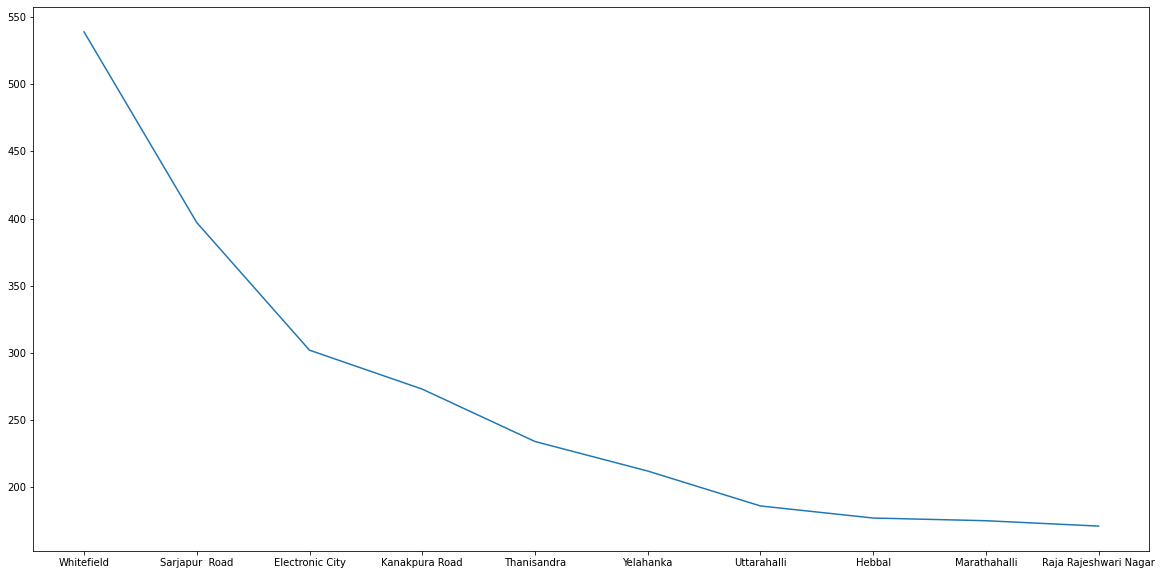

In [55]:
loc = df['location'].value_counts()[:10]
plt.plot(loc)
plt.show()

## Price Per Sqft.

<AxesSubplot:xlabel='total_sqft', ylabel='price'>

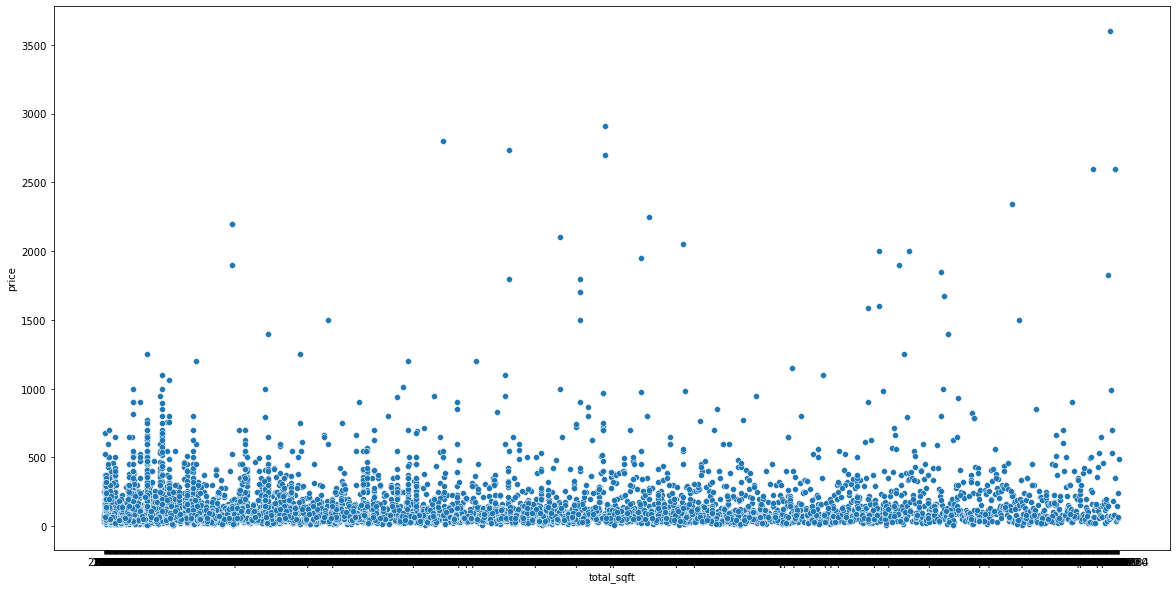

In [62]:
sns.scatterplot(x='total_sqft',y='price',data=df)

<AxesSubplot:xlabel='bhk', ylabel='count'>

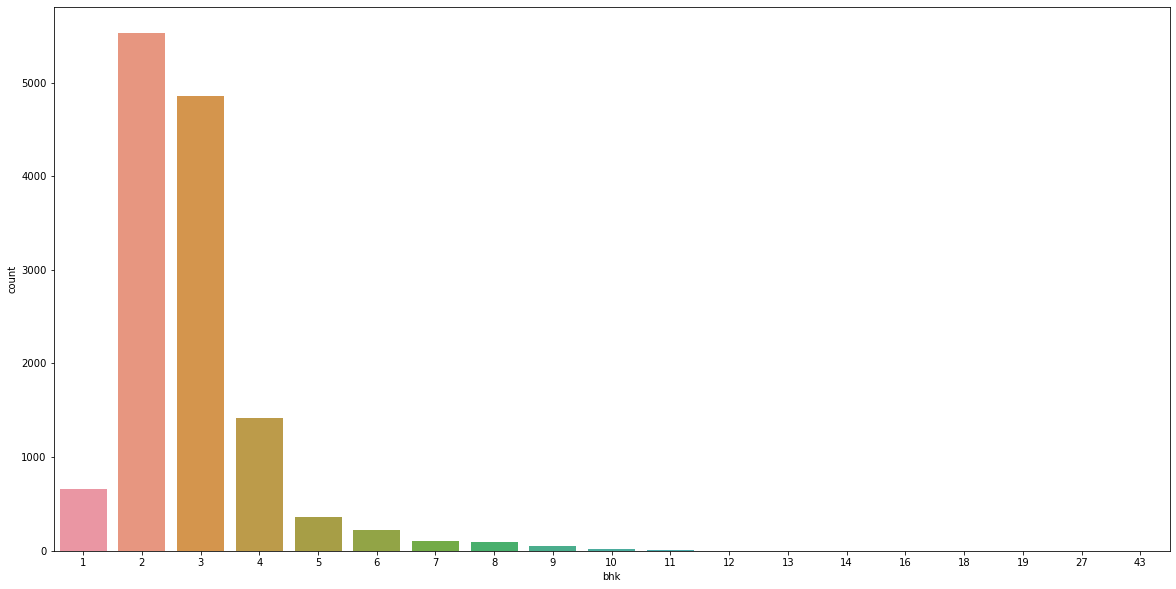

In [60]:
sns.countplot(x='bhk',data=df)

# summary:- 

## So This is the data set which is benglore house prices.
## We had 13320 rows and 9 columns in the data.
## I have cleaned data and applied some statistical techniques to it.
## I have done some visualizaion on top of it.